# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []
        


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city
    city_url = url + "&appid=" + weather_api_key + "&q=" + city.replace(" ","+")
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1


    try:
        # Run an API request for each of the cities
            # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
                         
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vila velha
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | norman wells
Processing Record 4 of Set 1 | kursumlija
Processing Record 5 of Set 1 | roma
Processing Record 6 of Set 1 | florianopolis
Processing Record 7 of Set 1 | teguise
Processing Record 8 of Set 1 | fairlie
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | dunedin
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | sao filipe
Processing Record 14 of Set 1 | plettenberg bay
Processing Record 15 of Set 1 | okato
Processing Record 16 of Set 1 | lompoc
Processing Record 17 of Set 1 | utiroa
City not found. Skipping...
Processing Record 18 of Set 1 | luanda
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | lavrentiya
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | burgeo
Processing Recor

Processing Record 37 of Set 4 | zaterechnyy
Processing Record 38 of Set 4 | chuy
Processing Record 39 of Set 4 | monrovia
Processing Record 40 of Set 4 | nevel
Processing Record 41 of Set 4 | luderitz
Processing Record 42 of Set 4 | natchez
Processing Record 43 of Set 4 | malanje
Processing Record 44 of Set 4 | tasiilaq
Processing Record 45 of Set 4 | carroll
Processing Record 46 of Set 4 | bowen
Processing Record 47 of Set 4 | stokmarknes
Processing Record 48 of Set 4 | kazalinsk
City not found. Skipping...
Processing Record 49 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 50 of Set 4 | kirakira
Processing Record 1 of Set 5 | gali
Processing Record 2 of Set 5 | gland
Processing Record 3 of Set 5 | beloha
Processing Record 4 of Set 5 | san policarpo
Processing Record 5 of Set 5 | pacific grove
Processing Record 6 of Set 5 | avera
Processing Record 7 of Set 5 | sioux lookout
Processing Record 8 of Set 5 | ginda
Processing Record 9 of Set 5 | kijang
Processing Reco

City not found. Skipping...
Processing Record 28 of Set 8 | nishihara
Processing Record 29 of Set 8 | nyurba
Processing Record 30 of Set 8 | jumla
Processing Record 31 of Set 8 | nurma
Processing Record 32 of Set 8 | kieta
Processing Record 33 of Set 8 | guadix
Processing Record 34 of Set 8 | miri
Processing Record 35 of Set 8 | bibiani
Processing Record 36 of Set 8 | nadym
Processing Record 37 of Set 8 | faanui
Processing Record 38 of Set 8 | cobija
Processing Record 39 of Set 8 | pathein
Processing Record 40 of Set 8 | makokou
Processing Record 41 of Set 8 | powell
Processing Record 42 of Set 8 | praia
Processing Record 43 of Set 8 | mrirt
City not found. Skipping...
Processing Record 44 of Set 8 | college
Processing Record 45 of Set 8 | mezen
Processing Record 46 of Set 8 | hjelset
Processing Record 47 of Set 8 | fakse ladeplads
Processing Record 48 of Set 8 | roald
Processing Record 49 of Set 8 | tarudant
City not found. Skipping...
Processing Record 50 of Set 8 | tinskoy
Processin

Processing Record 14 of Set 12 | kruisfontein
Processing Record 15 of Set 12 | qandahar
City not found. Skipping...
Processing Record 16 of Set 12 | puerto escondido
Processing Record 17 of Set 12 | lagunas
Processing Record 18 of Set 12 | mabaruma
Processing Record 19 of Set 12 | qaqortoq
Processing Record 20 of Set 12 | chepen
Processing Record 21 of Set 12 | truckee
Processing Record 22 of Set 12 | ceres
Processing Record 23 of Set 12 | san cristobal
Processing Record 24 of Set 12 | sayyan
Processing Record 25 of Set 12 | moranbah
Processing Record 26 of Set 12 | owerri
Processing Record 27 of Set 12 | naze
Processing Record 28 of Set 12 | tungkang
City not found. Skipping...
Processing Record 29 of Set 12 | sinnamary
Processing Record 30 of Set 12 | kaoma
Processing Record 31 of Set 12 | toma
Processing Record 32 of Set 12 | keokuk
Processing Record 33 of Set 12 | amazar
Processing Record 34 of Set 12 | mayor pablo lagerenza
Processing Record 35 of Set 12 | trincomalee
Processing R

In [4]:
city_data

[{'Lat': -20.3297,
  'Lng': -40.2925,
  'Max Temp': 82.35,
  'Humidity': 79,
  'Cloudiness': 0,
  'Wind Speed': 13.8,
  'Country': 'BR',
  'Date': 1675974057},
 {'Lat': 42.6001,
  'Lng': -73.9662,
  'Max Temp': 44.73,
  'Humidity': 84,
  'Cloudiness': 100,
  'Wind Speed': 4,
  'Country': 'US',
  'Date': 1675973727},
 {'Lat': 65.282,
  'Lng': -126.8329,
  'Max Temp': -9.36,
  'Humidity': 70,
  'Cloudiness': 20,
  'Wind Speed': 5.75,
  'Country': 'CA',
  'Date': 1675974059},
 {'Lat': 43.1458,
  'Lng': 21.2686,
  'Max Temp': 26.65,
  'Humidity': 68,
  'Cloudiness': 13,
  'Wind Speed': 1.59,
  'Country': 'RS',
  'Date': 1675974061},
 {'Lat': 43.2128,
  'Lng': -75.4557,
  'Max Temp': 42.87,
  'Humidity': 93,
  'Cloudiness': 100,
  'Wind Speed': 11.5,
  'Country': 'US',
  'Date': 1675974061},
 {'Lat': -27.6146,
  'Lng': -48.5012,
  'Max Temp': 78.03,
  'Humidity': 83,
  'Cloudiness': 40,
  'Wind Speed': 4.61,
  'Country': 'BR',
  'Date': 1675974061},
 {'Lat': 29.0605,
  'Lng': -13.564,
  'Ma

In [5]:
# Convert the cities weather data into a Pandas DataFrame
s1 = json.dumps(city_data)
d2 = json.loads(s1)
city_data_df = pd.json_normalize(d2)

#Show Record Count
city_data_df.count()

Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,-20.3297,-40.2925,82.35,79,0,13.80,BR,1675974057
1,42.6001,-73.9662,44.73,84,100,4.00,US,1675973727
2,65.2820,-126.8329,-9.36,70,20,5.75,CA,1675974059
3,43.1458,21.2686,26.65,68,13,1.59,RS,1675974061
4,43.2128,-75.4557,42.87,93,100,11.50,US,1675974061


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,
0,-20.3297,-40.2925,82.35,79,0,13.80,BR,1675974057
1,42.6001,-73.9662,44.73,84,100,4.00,US,1675973727
2,65.2820,-126.8329,-9.36,70,20,5.75,CA,1675974059
3,43.1458,21.2686,26.65,68,13,1.59,RS,1675974061
4,43.2128,-75.4557,42.87,93,100,11.50,US,1675974061


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [15]:
city_data_df = city_data_df.rename(columns={"Lat": "Latitude", 
                                            "Max Temp": "Max Temperature (C)", 
                                            "Humidity": "Humidity (%)"
                                           })




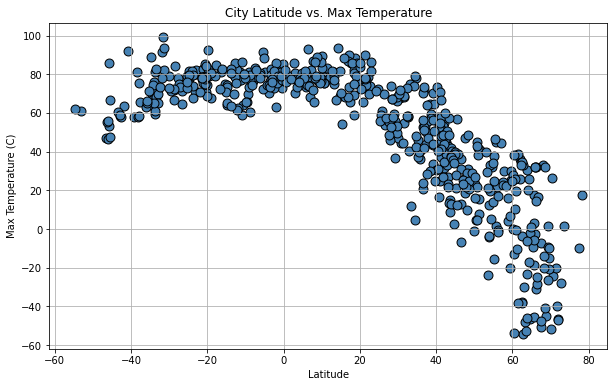

In [16]:
# Build scatter plot for latitude vs. temperature
city_ltscatter = city_data_df.plot.scatter(x='Latitude',
                                           y='Max Temperature (C)', 
                                           title="City Latitude vs. Max Temperature", 
                                           c="steelblue", 
                                           edgecolor='black', 
                                           figsize=(10,6), 
                                           s= 80,
                                           grid=True
                                          )

# Incorporate the other graph properties


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

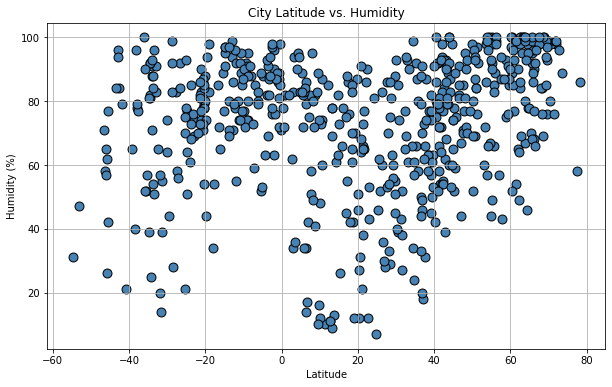

In [17]:
# Build the scatter plots for latitude vs. humidity
city_lhscatter = city_data_df.plot.scatter(x='Latitude',
                                           y='Humidity (%)', 
                                           title="City Latitude vs. Humidity", 
                                           c="steelblue", 
                                           edgecolor='black', 
                                           figsize=(10,6), 
                                           s= 80,
                                           grid=True
                                          )


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

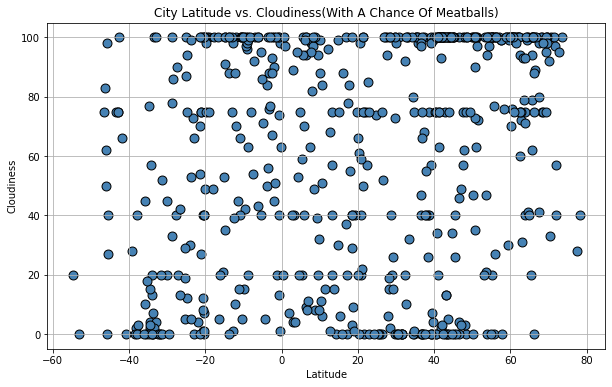

In [18]:
# Build the scatter plots for latitude vs. cloudiness
city_lcscatter = city_data_df.plot.scatter(x='Latitude',
                                           y='Cloudiness', 
                                           title="City Latitude vs. Cloudiness(With A Chance Of Meatballs)", 
                                           c="steelblue", 
                                           edgecolor='black', 
                                           figsize=(10,6), 
                                           s= 80,
                                           grid=True
                                          )
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

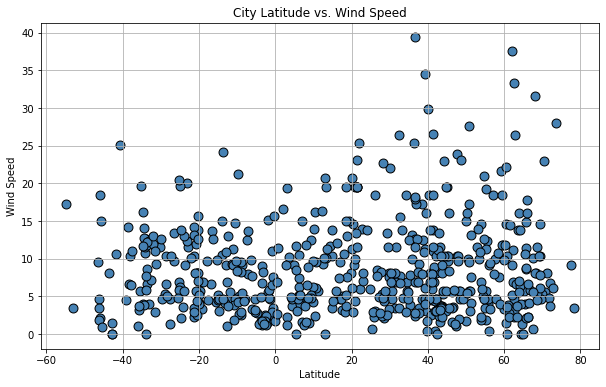

In [19]:
# Build the scatter plots for latitude vs. wind speed
city_lwscatter = city_data_df.plot.scatter(x='Latitude',
                                           y='Wind Speed', 
                                           title="City Latitude vs. Wind Speed", 
                                           c="steelblue", 
                                           edgecolor='black', 
                                           figsize=(10,6), 
                                           s= 80,
                                           grid=True
                                          )

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Latitude'] >= 0)]

# Display sample data
northern_hemi_df.head()

,Latitude,Lng,Max Temperature (C),Humidity (%),Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,
1,42.6001,-73.9662,44.73,84,100,4.00,US,1675973727
2,65.2820,-126.8329,-9.36,70,20,5.75,CA,1675974059
3,43.1458,21.2686,26.65,68,13,1.59,RS,1675974061
4,43.2128,-75.4557,42.87,93,100,11.50,US,1675974061
6,29.0605,-13.5640,59.22,63,20,4.61,ES,1675974063


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Latitude'] <= 0)]

# Display sample data
southern_hemi_df.head()

,Latitude,Lng,Max Temperature (C),Humidity (%),Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,
0,-20.3297,-40.2925,82.35,79,0,13.80,BR,1675974057
5,-27.6146,-48.5012,78.03,83,40,4.61,BR,1675974061
8,-33.9258,18.4232,75.90,71,0,12.66,ZA,1675973650
9,-45.8742,170.5036,53.31,62,98,2.17,NZ,1675973592
11,-23.1203,-134.9692,80.06,74,66,20.11,PF,1675973744


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.7258955255304079


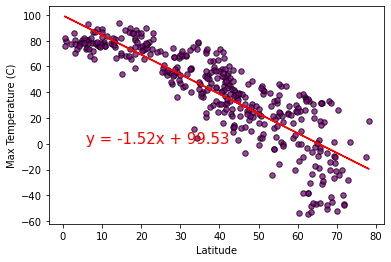

In [23]:
# Linear regression on Northern Hemisphere
x_valuesn = northern_hemi_df['Latitude']
y_valuesn = northern_hemi_df["Max Temperature (C)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_valuesn, y_valuesn)
regress_values = x_valuesn * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_valuesn,y_valuesn, marker="o", facecolors="purple", edgecolors="black",
            s=30, alpha=0.75)
plt.plot(x_valuesn,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
print(f"The r-value is {rvalue**2}")
plt.show()

The r-value is 0.20020845087910424


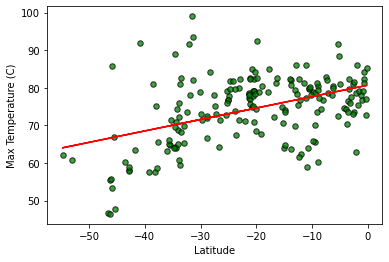

In [24]:
# Linear regression on Southern Hemisphere


x_valuess = southern_hemi_df['Latitude']
y_valuess = southern_hemi_df["Max Temperature (C)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_valuess, y_valuess)
regress_values = x_valuess * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_valuess,y_valuess, marker="o", facecolors="green", edgecolors="black",
            s=30, alpha=0.75)
plt.plot(x_valuess,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
print(f"The r-value is {rvalue**2}")
plt.show()

**Discussion about the linear relationship between latitude and temperature:** 

Northern Hemisphere r-value: 0.7258955255304079

Southern Hemisphere r-value: 0.20020845087910424

There is a dicrepency between the two r-values detected for the northern and southern hemispheres when looking at the linear relationship between latitude and temperature of a city. The northern hemisphere appears to detect a stronger correlation between latitude and its impact on temperature. However, a weaker correlation  was detected for the southern hemisphere. Seeing that there should not be that much discrepency between the two, it can be assumed that there are other factors that are impacting temperature, beyond that of temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.18651499881453976


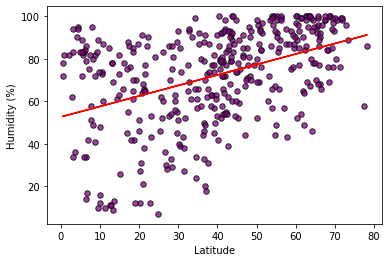

In [25]:
# Northern Hemisphere
x_valuesn = northern_hemi_df['Latitude']
y_valuesn = northern_hemi_df["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_valuesn, y_valuesn)
regress_values = x_valuesn * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_valuesn,y_valuesn, marker="o", facecolors="purple", edgecolors="black",
            s=30, alpha=0.75)
plt.plot(x_valuesn,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is {rvalue**2}")
plt.show()

The r-value is 0.13639078309293612


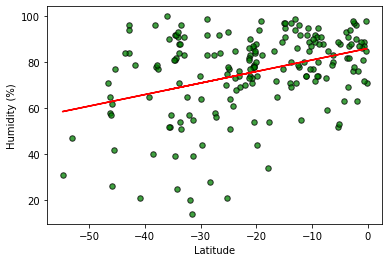

In [26]:
# Southern Hemisphere
x_valuess = southern_hemi_df['Latitude']
y_valuess = southern_hemi_df["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_valuess, y_valuess)
regress_values = x_valuess * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_valuess,y_valuess, marker="o", facecolors="green", edgecolors="black",
            s=30, alpha=0.75)
plt.plot(x_valuess,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is {rvalue**2}")
plt.show()

**Discussion about the linear relationship between latitude and humidity:** 

Northern Hemisphere r-value: 0.18651499881453976

Southern Hemisphere r-value:  0.13639078309293612

In both instances, there appears to be an insignificant linear relationship between the latitude and humidity of a city. As demontrated by the scatter plots, there is little uniformity to the values that were used to calculate. Seeing that both r-values were below 20%, it can be understood that latitude has little impact on humidity and other factors could be considered for future study. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.07470884013666178


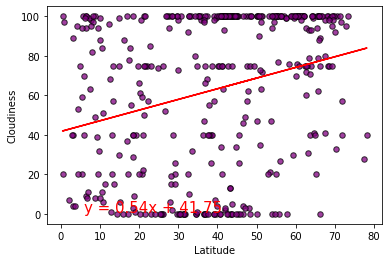

In [27]:
# Northern Hemisphere
x_valuesn = northern_hemi_df['Latitude']
y_valuesn = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_valuesn, y_valuesn)
regress_values = x_valuesn * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_valuesn,y_valuesn, marker="o", facecolors="purple", edgecolors="black",
            s=30, alpha=0.75)
plt.plot(x_valuesn,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is {rvalue**2}")
plt.show()

The r-value is 0.15268862300768085


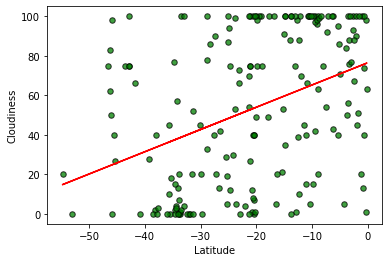

In [28]:
# Southern Hemisphere
x_valuess = southern_hemi_df['Latitude']
y_valuess = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_valuess, y_valuess)
regress_values = x_valuess * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_valuess,y_valuess, marker="o", facecolors="green", edgecolors="black",
            s=30, alpha=0.75)
plt.plot(x_valuess,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is {rvalue**2}")
plt.show()

**Discussion about the linear relationship between latitude and cloudiness:** 

Northern Hemisphere r-value: 0.07470884013666178

Southern Hemisphere r-value: 0.15268862300768085

Little significance was found when detecting the correlation between latitude and the cloudiness of a city. both r-values fell around the 10% mark. In general, the random plactement of markers on the scatter plots illustrate that there is a wide range of data. The combination of the two demonstrates that there is little correlation bewteen latitude and its impact on cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.0010561707759052816


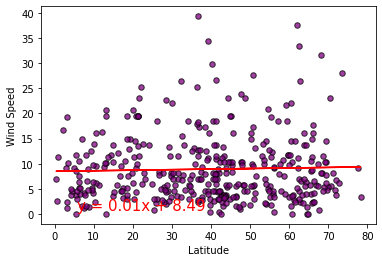

In [29]:
# Northern Hemisphere
x_valuesn = northern_hemi_df['Latitude']
y_valuesn = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_valuesn, y_valuesn)
regress_values = x_valuesn * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_valuesn,y_valuesn, marker="o", facecolors="purple", edgecolors="black",
            s=30, alpha=0.75)
plt.plot(x_valuesn,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is {rvalue**2}")
plt.show()

The r-value is 0.033886139706808004


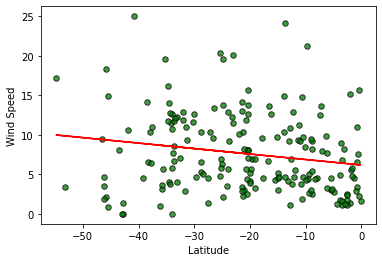

In [30]:
# Southern Hemisphere
x_valuess = southern_hemi_df['Latitude']
y_valuess = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_valuess, y_valuess)
regress_values = x_valuess * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_valuess,y_valuess, marker="o", facecolors="green", edgecolors="black",
            s=30, alpha=0.75)
plt.plot(x_valuess,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is {rvalue**2}")
plt.show()


**Discussion about the linear relationship between latitude and wind speed:** 

Northern Hemisphere r-value: 0.0010561707759052816

Southern Hemisphere r-value:  0.033886139706808004

When detecting the correlation between latitude and wind speed the r-values generated both fell below 10%. This demostrates that there is not a significant correlation. Of all of our tests, the correlative relationship between these two factors appears to be the most insignificant. 